<a href="https://colab.research.google.com/github/SushilKokare/University_Project/blob/Keras_Applications_Modified/KA_1_Xception_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
from keras import backend as k
from keras.applications.xception import Xception
from matplotlib import pyplot as plt

from keras.layers import Dropout

In [4]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [5]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [6]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [7]:
train_data.image_shape

(225, 225, 3)

In [8]:
# Base Model = Xception

In [9]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

83683744/83683744 [==============================] - 15s 0us/step


In [10]:
for layer in base_model.layers:
  layer.trainable = False

In [13]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

Epoch 1/10
71/71 [==============================] - 581s 8s/step - loss: 2.8992 - accuracy: 0.6522 - val_loss: 0.6504 - val_accuracy: 0.6160
Epoch 2/10
71/71 [==============================] - 13s 174ms/step - loss: 0.4488 - accuracy: 0.7863 - val_loss: 0.6082 - val_accuracy: 0.6480
Epoch 3/10
71/71 [==============================] - 12s 173ms/step - loss: 0.3370 - accuracy: 0.8618 - val_loss: 0.7837 - val_accuracy: 0.6480
Epoch 4/10
71/71 [==============================] - 13s 175ms/step - loss: 0.2761 - accuracy: 0.8841 - val_loss: 0.6268 - val_accuracy: 0.6520
Epoch 5/10
71/71 [==============================] - 12s 168ms/step - loss: 0.2007 - accuracy: 0.9223 - val_loss: 0.8194 - val_accuracy: 0.6440
Epoch 6/10
71/71 [==============================] - 12s 172ms/step - loss: 0.1618 - accuracy: 0.9378 - val_loss: 0.4873 - val_accuracy: 0.7880
Epoch 7/10
71/71 [==============================] - 12s 172ms/step - loss: 0.1185 - accuracy: 0.9547 - val_loss: 0.8972 - val_accuracy: 0.6520
E

In [16]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

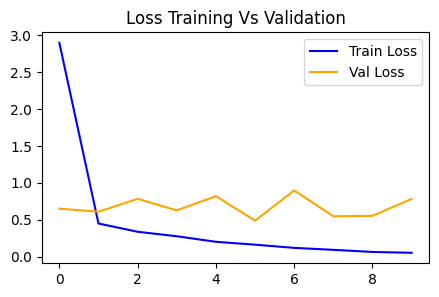

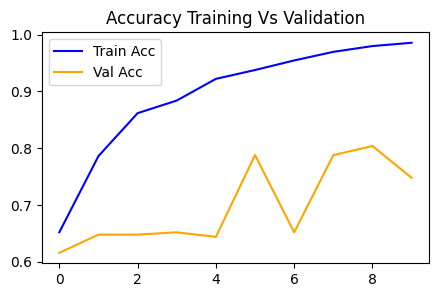

In [17]:
show_result(history)

In [18]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

In [19]:
for layer in base_model.layers:
  layer.trainable = False

In [22]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

Epoch 1/10
71/71 [==============================] - 19s 196ms/step - loss: 3.2426 - accuracy: 0.5891 - val_loss: 0.7478 - val_accuracy: 0.5840
Epoch 2/10
71/71 [==============================] - 13s 182ms/step - loss: 0.6189 - accuracy: 0.7121 - val_loss: 0.6912 - val_accuracy: 0.6800
Epoch 3/10
71/71 [==============================] - 13s 187ms/step - loss: 0.4411 - accuracy: 0.7845 - val_loss: 0.6173 - val_accuracy: 0.6600
Epoch 4/10
71/71 [==============================] - 13s 178ms/step - loss: 0.4230 - accuracy: 0.7943 - val_loss: 0.8244 - val_accuracy: 0.5840
Epoch 5/10
71/71 [==============================] - 12s 170ms/step - loss: 0.4714 - accuracy: 0.7703 - val_loss: 0.7082 - val_accuracy: 0.5640
Epoch 6/10
71/71 [==============================] - 13s 180ms/step - loss: 0.4332 - accuracy: 0.7854 - val_loss: 0.5885 - val_accuracy: 0.5720
Epoch 7/10
71/71 [==============================] - 15s 206ms/step - loss: 0.3361 - accuracy: 0.8121 - val_loss: 0.7625 - val_accuracy: 0.6240

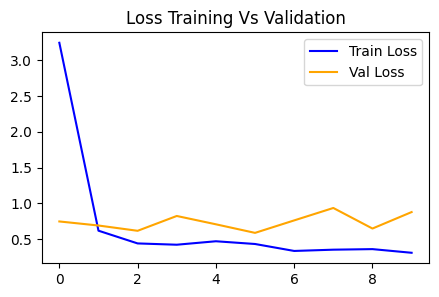

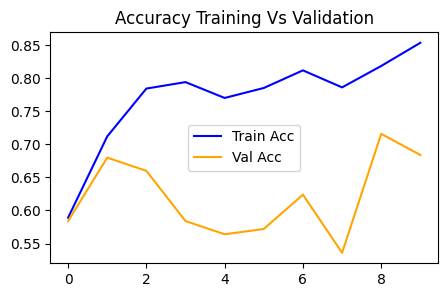

In [24]:
show_result(history)

In [33]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(225,225,1 )))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.01))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))

Epoch 1/10
71/71 [==============================] - 21s 188ms/step - loss: 0.6476 - accuracy: 0.6157 - val_loss: 0.6479 - val_accuracy: 0.5000
Epoch 2/10
71/71 [==============================] - 12s 166ms/step - loss: 0.5271 - accuracy: 0.7201 - val_loss: 0.7170 - val_accuracy: 0.6360
Epoch 3/10
71/71 [==============================] - 12s 172ms/step - loss: 0.4532 - accuracy: 0.7832 - val_loss: 0.6290 - val_accuracy: 0.6520
Epoch 4/10
71/71 [==============================] - 13s 175ms/step - loss: 0.3989 - accuracy: 0.8183 - val_loss: 0.6131 - val_accuracy: 0.7040
Epoch 5/10
71/71 [==============================] - 12s 175ms/step - loss: 0.3386 - accuracy: 0.8485 - val_loss: 0.5733 - val_accuracy: 0.7360
Epoch 6/10
71/71 [==============================] - 13s 178ms/step - loss: 0.2877 - accuracy: 0.8849 - val_loss: 0.5999 - val_accuracy: 0.7480
Epoch 7/10
71/71 [==============================] - 13s 185ms/step - loss: 0.2249 - accuracy: 0.9107 - val_loss: 0.6153 - val_accuracy: 0.7360

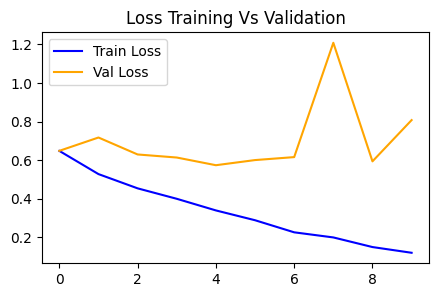

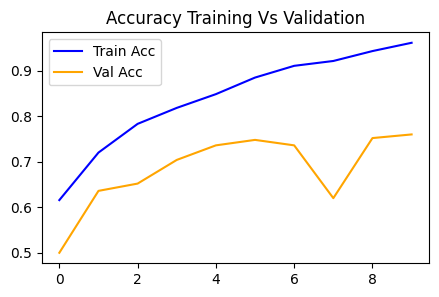

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

In [36]:
from keras.optimizers import Adam

In [41]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(225,225,1 )))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.01))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(225,225,1 )))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))


opt  = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

Epoch 1/10
71/71 [==============================] - 16s 185ms/step - loss: 0.6246 - accuracy: 0.6477 - val_loss: 0.7059 - val_accuracy: 0.5200
Epoch 2/10
71/71 [==============================] - 12s 170ms/step - loss: 0.5254 - accuracy: 0.7308 - val_loss: 0.6573 - val_accuracy: 0.6280
Epoch 3/10
71/71 [==============================] - 12s 171ms/step - loss: 0.4167 - accuracy: 0.8090 - val_loss: 0.6880 - val_accuracy: 0.6120
Epoch 4/10
71/71 [==============================] - 12s 168ms/step - loss: 0.3224 - accuracy: 0.8636 - val_loss: 0.6335 - val_accuracy: 0.7000
Epoch 5/10
71/71 [==============================] - 12s 173ms/step - loss: 0.2475 - accuracy: 0.9023 - val_loss: 0.8125 - val_accuracy: 0.6640
Epoch 6/10
71/71 [==============================] - 12s 172ms/step - loss: 0.1750 - accuracy: 0.9347 - val_loss: 0.8189 - val_accuracy: 0.6560
Epoch 7/10
71/71 [==============================] - 14s 190ms/step - loss: 0.1266 - accuracy: 0.9569 - val_loss: 1.0532 - val_accuracy: 0.6000

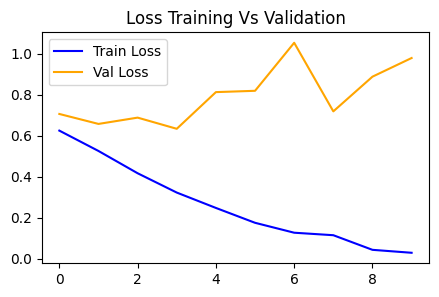

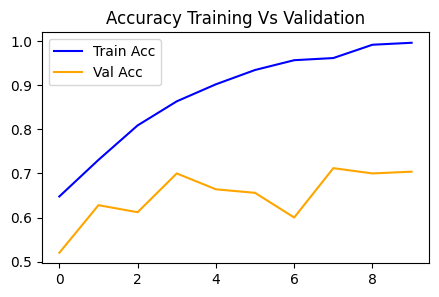

In [43]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(225,225,1 )))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))


opt  = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

Epoch 1/10
71/71 [==============================] - 16s 185ms/step - loss: 0.6088 - accuracy: 0.6686 - val_loss: 0.6642 - val_accuracy: 0.5680
Epoch 2/10
71/71 [==============================] - 12s 172ms/step - loss: 0.4966 - accuracy: 0.7579 - val_loss: 0.5973 - val_accuracy: 0.6480
Epoch 3/10
71/71 [==============================] - 12s 172ms/step - loss: 0.3821 - accuracy: 0.8250 - val_loss: 0.8608 - val_accuracy: 0.5480
Epoch 4/10
71/71 [==============================] - 12s 172ms/step - loss: 0.2917 - accuracy: 0.8876 - val_loss: 0.6067 - val_accuracy: 0.7040
Epoch 5/10
71/71 [==============================] - 13s 176ms/step - loss: 0.2145 - accuracy: 0.9187 - val_loss: 0.5837 - val_accuracy: 0.7080
Epoch 6/10
71/71 [==============================] - 12s 169ms/step - loss: 0.1623 - accuracy: 0.9462 - val_loss: 0.6289 - val_accuracy: 0.7520
Epoch 7/10
71/71 [==============================] - 12s 173ms/step - loss: 0.0914 - accuracy: 0.9756 - val_loss: 1.0594 - val_accuracy: 0.6440

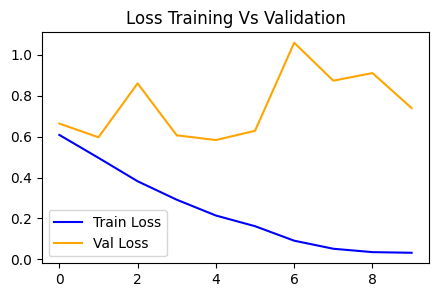

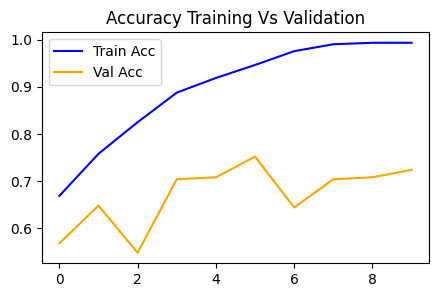

In [44]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(225,225,1 )))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))


opt  = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

In [46]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


opt  = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

Epoch 1/10
71/71 [==============================] - 16s 184ms/step - loss: 1.4016 - accuracy: 0.6935 - val_loss: 0.6914 - val_accuracy: 0.6800
Epoch 2/10
71/71 [==============================] - 12s 173ms/step - loss: 0.3536 - accuracy: 0.8503 - val_loss: 0.6120 - val_accuracy: 0.7240
Epoch 3/10
71/71 [==============================] - 12s 171ms/step - loss: 0.1833 - accuracy: 0.9258 - val_loss: 0.4964 - val_accuracy: 0.7840
Epoch 4/10
71/71 [==============================] - 13s 180ms/step - loss: 0.1035 - accuracy: 0.9676 - val_loss: 0.5655 - val_accuracy: 0.7840
Epoch 5/10
71/71 [==============================] - 12s 172ms/step - loss: 0.0587 - accuracy: 0.9871 - val_loss: 0.9276 - val_accuracy: 0.6960
Epoch 6/10
71/71 [==============================] - 12s 171ms/step - loss: 0.0407 - accuracy: 0.9951 - val_loss: 0.5097 - val_accuracy: 0.7960
Epoch 7/10
71/71 [==============================] - 13s 182ms/step - loss: 0.0285 - accuracy: 0.9973 - val_loss: 0.9827 - val_accuracy: 0.6720

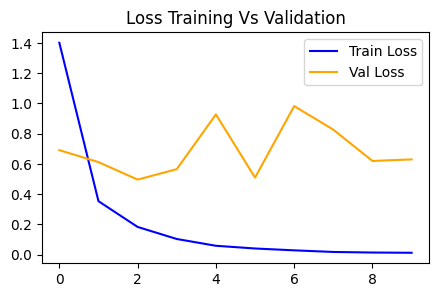

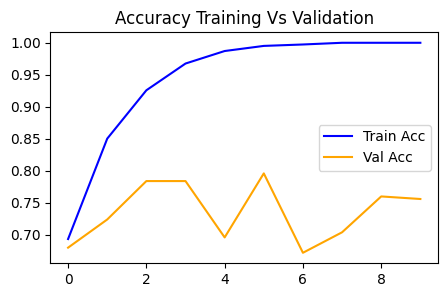

In [47]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

Epoch 1/10
71/71 [==============================] - 16s 177ms/step - loss: 1.4540 - accuracy: 0.6779 - val_loss: 0.9393 - val_accuracy: 0.6680
Epoch 2/10
71/71 [==============================] - 12s 170ms/step - loss: 0.4513 - accuracy: 0.8285 - val_loss: 0.6025 - val_accuracy: 0.7440
Epoch 3/10
71/71 [==============================] - 12s 171ms/step - loss: 0.2378 - accuracy: 0.8992 - val_loss: 0.5918 - val_accuracy: 0.7360
Epoch 4/10
71/71 [==============================] - 12s 171ms/step - loss: 0.1238 - accuracy: 0.9520 - val_loss: 0.5575 - val_accuracy: 0.7520
Epoch 5/10
71/71 [==============================] - 12s 170ms/step - loss: 0.0690 - accuracy: 0.9800 - val_loss: 0.8599 - val_accuracy: 0.7000
Epoch 6/10
71/71 [==============================] - 13s 180ms/step - loss: 0.0391 - accuracy: 0.9960 - val_loss: 0.6916 - val_accuracy: 0.7280
Epoch 7/10
71/71 [==============================] - 13s 185ms/step - loss: 0.0265 - accuracy: 0.9996 - val_loss: 0.4624 - val_accuracy: 0.8000

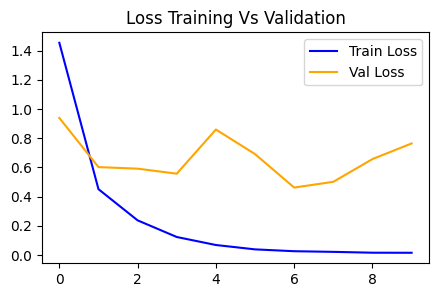

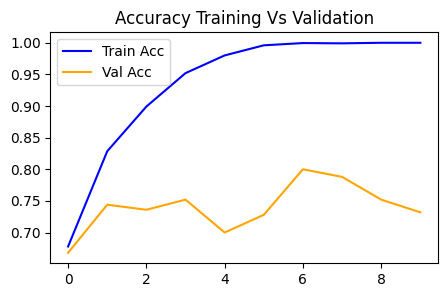

In [48]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

Epoch 1/10
71/71 [==============================] - 16s 183ms/step - loss: 1.5668 - accuracy: 0.6793 - val_loss: 1.0114 - val_accuracy: 0.6920
Epoch 2/10
71/71 [==============================] - 13s 177ms/step - loss: 0.4210 - accuracy: 0.8490 - val_loss: 0.9901 - val_accuracy: 0.6960
Epoch 3/10
71/71 [==============================] - 12s 171ms/step - loss: 0.2592 - accuracy: 0.9027 - val_loss: 0.7414 - val_accuracy: 0.7160
Epoch 4/10
71/71 [==============================] - 12s 171ms/step - loss: 0.1187 - accuracy: 0.9565 - val_loss: 0.6689 - val_accuracy: 0.7640
Epoch 5/10
71/71 [==============================] - 12s 172ms/step - loss: 0.0655 - accuracy: 0.9778 - val_loss: 0.8065 - val_accuracy: 0.7240
Epoch 6/10
71/71 [==============================] - 12s 173ms/step - loss: 0.0495 - accuracy: 0.9893 - val_loss: 0.8341 - val_accuracy: 0.6960
Epoch 7/10
71/71 [==============================] - 21s 292ms/step - loss: 0.0225 - accuracy: 0.9982 - val_loss: 0.8572 - val_accuracy: 0.7240

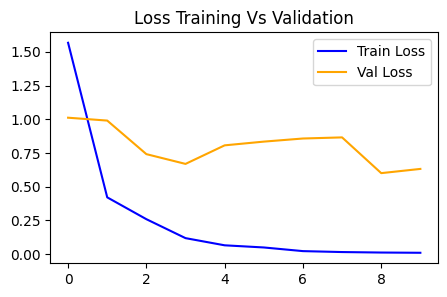

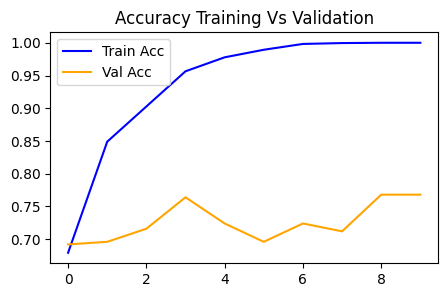

In [49]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

Epoch 1/10
71/71 [==============================] - 16s 180ms/step - loss: 1.0193 - accuracy: 0.7059 - val_loss: 0.6957 - val_accuracy: 0.6760
Epoch 2/10
71/71 [==============================] - 13s 187ms/step - loss: 0.3115 - accuracy: 0.8752 - val_loss: 0.8228 - val_accuracy: 0.6720
Epoch 3/10
71/71 [==============================] - 12s 173ms/step - loss: 0.2533 - accuracy: 0.9045 - val_loss: 0.9230 - val_accuracy: 0.7280
Epoch 4/10
71/71 [==============================] - 13s 183ms/step - loss: 0.1936 - accuracy: 0.9205 - val_loss: 0.7041 - val_accuracy: 0.7280
Epoch 5/10
71/71 [==============================] - 12s 164ms/step - loss: 0.0828 - accuracy: 0.9685 - val_loss: 0.6021 - val_accuracy: 0.7600
Epoch 6/10
71/71 [==============================] - 12s 164ms/step - loss: 0.0359 - accuracy: 0.9911 - val_loss: 0.6947 - val_accuracy: 0.7600
Epoch 7/10
71/71 [==============================] - 12s 170ms/step - loss: 0.0210 - accuracy: 0.9996 - val_loss: 0.4863 - val_accuracy: 0.7920

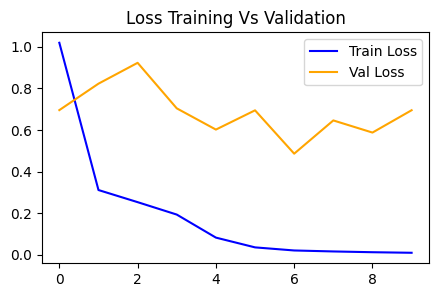

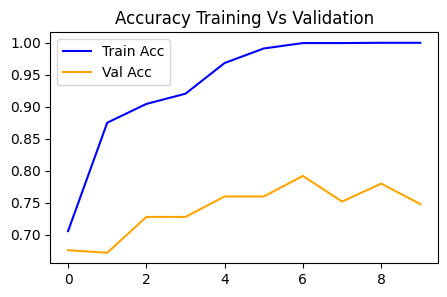

In [50]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

opt = Adam(learning_rate=0.01)

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

show_result(history)

Epoch 1/25
71/71 [==============================] - 16s 184ms/step - loss: 1.3425 - accuracy: 0.6846 - val_loss: 1.1951 - val_accuracy: 0.6040
Epoch 2/25
71/71 [==============================] - 12s 166ms/step - loss: 0.4868 - accuracy: 0.8143 - val_loss: 0.6890 - val_accuracy: 0.7520
Epoch 3/25
71/71 [==============================] - 12s 172ms/step - loss: 0.2333 - accuracy: 0.9054 - val_loss: 0.6651 - val_accuracy: 0.7200
Epoch 4/25
71/71 [==============================] - 12s 171ms/step - loss: 0.1616 - accuracy: 0.9280 - val_loss: 0.7927 - val_accuracy: 0.6760
Epoch 5/25
71/71 [==============================] - 12s 168ms/step - loss: 0.0681 - accuracy: 0.9813 - val_loss: 0.8371 - val_accuracy: 0.7080
Epoch 6/25
71/71 [==============================] - 12s 173ms/step - loss: 0.0382 - accuracy: 0.9951 - val_loss: 0.6000 - val_accuracy: 0.7720
Epoch 7/25
71/71 [==============================] - 12s 169ms/step - loss: 0.0279 - accuracy: 0.9973 - val_loss: 0.7147 - val_accuracy: 0.7240

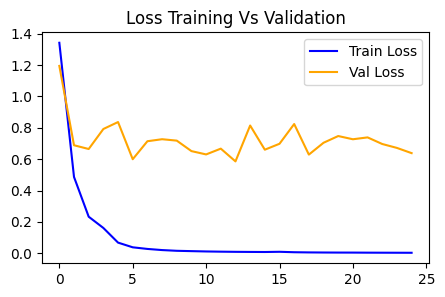

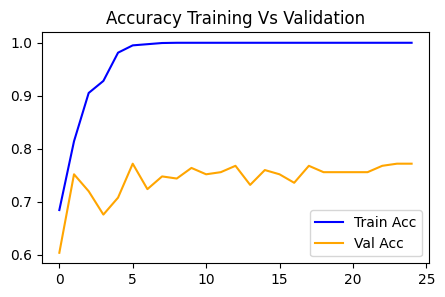

In [51]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

opt = Adam(learning_rate=0.01)

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=25,validation_data=test_data,
                    )

show_result(history)

Epoch 1/25
71/71 [==============================] - 16s 185ms/step - loss: 0.8370 - accuracy: 0.7108 - val_loss: 0.7732 - val_accuracy: 0.6800
Epoch 2/25
71/71 [==============================] - 12s 170ms/step - loss: 0.3908 - accuracy: 0.8570 - val_loss: 0.7939 - val_accuracy: 0.7160
Epoch 3/25
71/71 [==============================] - 12s 171ms/step - loss: 0.1715 - accuracy: 0.9303 - val_loss: 0.8087 - val_accuracy: 0.7120
Epoch 4/25
71/71 [==============================] - 12s 170ms/step - loss: 0.1287 - accuracy: 0.9529 - val_loss: 0.6164 - val_accuracy: 0.7600
Epoch 5/25
71/71 [==============================] - 12s 168ms/step - loss: 0.0627 - accuracy: 0.9787 - val_loss: 0.7654 - val_accuracy: 0.7560
Epoch 6/25
71/71 [==============================] - 13s 183ms/step - loss: 0.0598 - accuracy: 0.9787 - val_loss: 0.7842 - val_accuracy: 0.7560
Epoch 7/25
71/71 [==============================] - 12s 165ms/step - loss: 0.1687 - accuracy: 0.9325 - val_loss: 0.5911 - val_accuracy: 0.7920

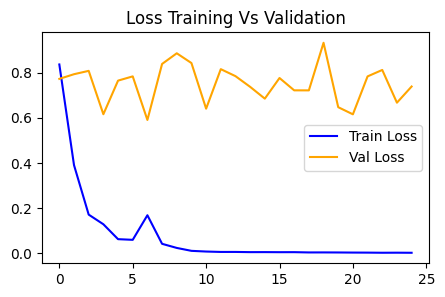

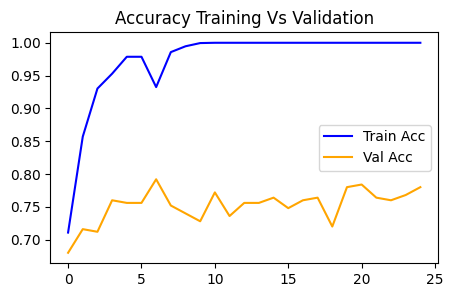

In [52]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

opt = Adam(learning_rate=0.01)

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=25,validation_data=test_data,
                    )

show_result(history)

Epoch 1/25
71/71 [==============================] - 18s 188ms/step - loss: 0.6208 - accuracy: 0.6419 - val_loss: 0.6226 - val_accuracy: 0.6160
Epoch 2/25
71/71 [==============================] - 12s 171ms/step - loss: 0.5558 - accuracy: 0.6886 - val_loss: 0.7960 - val_accuracy: 0.5160
Epoch 3/25
71/71 [==============================] - 12s 174ms/step - loss: 0.5179 - accuracy: 0.7459 - val_loss: 0.6466 - val_accuracy: 0.6640
Epoch 4/25
71/71 [==============================] - 12s 171ms/step - loss: 0.4185 - accuracy: 0.7948 - val_loss: 0.7789 - val_accuracy: 0.5840
Epoch 5/25
71/71 [==============================] - 13s 188ms/step - loss: 0.3499 - accuracy: 0.8512 - val_loss: 0.7858 - val_accuracy: 0.6440
Epoch 6/25
71/71 [==============================] - 12s 171ms/step - loss: 0.2997 - accuracy: 0.8707 - val_loss: 0.7640 - val_accuracy: 0.6960
Epoch 7/25
71/71 [==============================] - 12s 172ms/step - loss: 0.2199 - accuracy: 0.9089 - val_loss: 0.9533 - val_accuracy: 0.6480

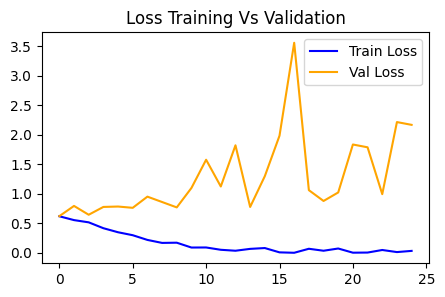

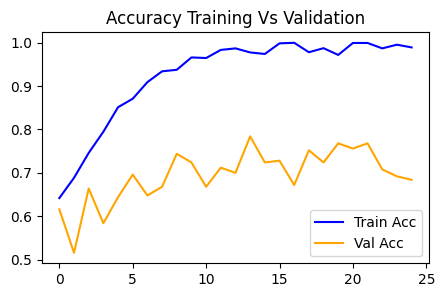

In [53]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable=False

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(225,225,1 )))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.01))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))


# opt = Adam(learning_rate=0.01)

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,epochs=25,validation_data=test_data,
                    )

show_result(history)